# Visualisation of data

In [52]:
import pandas
instance_data = pandas.read_csv("P-n40-k5_info_run.csv").truncate(before  = 4)
instance_data.keys()




Index(['Iteration', 'Objective', 'Hyper choice BP', 'Hyper choice BE1',
       'Hyper choice BE2', 'Hyper choice Exact', 'Average runtime',
       'Quality BP', 'Quality BE1', 'Quality BE2', 'Quality Exact',
       'Selection score BP', 'Selection score BE1', 'Selection score BE2',
       'Selection score Exact', 'Exploration', 'Theta', 'Accepted columns BP',
       'Accepted columns BE1', 'Accepted columns BE2',
       'Accepted columns Exact', 'Active path BP', 'Active path BE1',
       'Active path BE2', 'Active path Exact', 'No improvement',
       'Total active paths'],
      dtype='object')

## Compare choices of the Hyper Heuristic


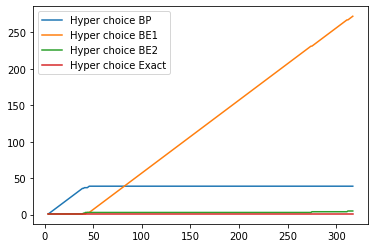

In [53]:

hyper_choice = ["Hyper choice BP","Hyper choice BE1","Hyper choice BE2","Hyper choice Exact"]

instance_data.plot(y = hyper_choice)


## Evolution of accepted columns
Accepted columns are columns generated added to the restricted master. 

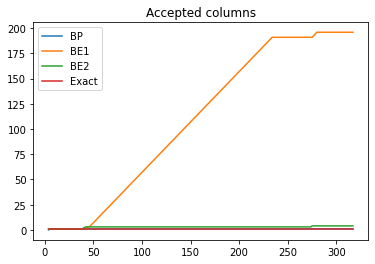

In [54]:
accepted_columns = ["Accepted columns BP","Accepted columns BE1","Accepted columns BE2","Accepted columns Exact"]
instance_data.plot(y = accepted_columns, title = "Accepted columns", label= ["BP","BE1","BE2","Exact"])

# Evolution of non-basic columns 
The number of non-basic columns in the restriced master at the given iteration


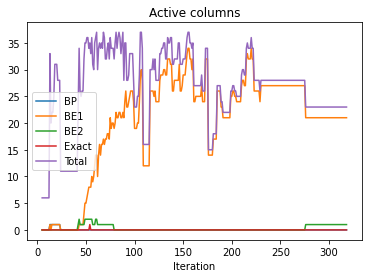

In [59]:
non_basic_columns = ["Active path BP","Active path BE1","Active path BE2","Active path Exact", "Total active paths"]
instance_data.plot(x = "Iteration", y = non_basic_columns, title = "Active columns", label = ["BP","BE1","BE2","Exact", "Total"])

## Compare evolution of heuristic quality


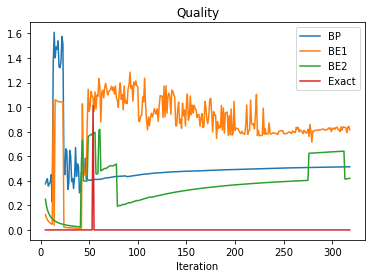

In [60]:
quality = ["Quality BP","Quality BE1","Quality BE2","Quality Exact"]
instance_data.plot(x = "Iteration", y = quality, title = "Quality", label= ["BP","BE1","BE2","Exact"])



## Compare selection score of heuristics

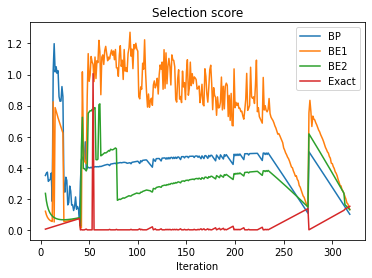

In [57]:
selection_score = ["Selection score BP", "Selection score BE1", "Selection score BE2", "Selection score Exact"] 
instance_data.plot(x = "Iteration", y = selection_score, title = "Selection score", label= ["BP","BE1","BE2","Exact"])

## Stagnation in the algorithm
No improvement is defined as objective stagnation or column not being produced. 


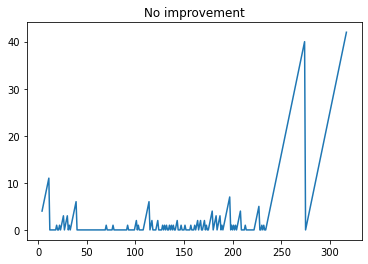

In [62]:
instance_data["No improvement"].plot(title = "No improvement", x)

##Comments

Observed behavior: 
Relevant data from instances in cvrp.csv are found above. The algorithm is working as expected, it ranks the heuristic based on our performance metric and the interplay between the Quality, Seledction score and No improvements graphs is reasonable. After prolonged periods of stagnation the search devolves to a spreading term with the adaptive scheme, as can for example be seen for instance A-n32-k5. Under the current performance metric the BestEdges1 pricing strategy outperforms the rest in most runs (e.g. A-n32-k5, A-n33-k6, P-n40-k7) and is effectively selected when the objective is improved. For some instances (e.g. P-n50-k7.vrp) BestEdges2 is ranked best. Given our chosen performance metric, it does seem like BestEdges1 is the best heuristic hands down. 

The BestPaths strategy performs moderately well with respect to the performance metric, since it is the fastest heuristic. However, on all instances it rarely dominates the number of active routes at a given time. This seems to indicate that the columns produced are of bad quality. 

Results: 
As can be seen in the run_comparison jupyter file, the hyper heuristic generally performs on par with BestEdges1 and better than Exact. On smaller to medium-sized instances from the P-set, BestEdges1 outperforms Hyper. On larger instances, the diversification built-in in Hyper seems to aid the search. It performs better than BE1 on many of the larger instances from the A-set and P-set. 

Further improvement: 
One behavior observed for many instances is prolonged search where there is no improvement in the objective function, followed by a short period of improvement, after which the search again stagnates (see instances P-n21-k2, P-n20-k2, P-n21-k2). For future work we consider re-doing the simple adaptive scheme to take into account the stagnation-history of a given run, and speed up the diversification after prolonged stagnation periods. Similarly, slow down the adaptive step if the periods are short. Currently, the adaptive scheme decreases with constant step size. 

One final word about 





### instance P-n22-k2
#### Quality
 - Descent and spikes correspond to stagnation of the algorithm, this is where the adaptive choice function sets in. Ranked selection -> pseudorandom seleciton
 - BestEdges1 outperforms the others in terms of non trivial columns in the current solution and usually outperforms accross instances. 
 - For non-best paths, most selected heuristic produce a valid columns
 - BestPaths is not good, but it outperforms if speed is the most weighted performance metric. 

### Trends
- on instances have large periods of no improvement vs short periods of improvement 
- have a simple adaptive term 

### instance P-n16-k8, medium sized instance
- One long state of no-improvement before Exact is called 

## instance P-n19-k2
- Jagged no_improvement for a while until improvement -> Consider calling Exact sooner

## Instance P-n20-k2
- Jagged behavior 

## Instance P-n21-k2
- Jagged behavoir 

## P-n22-k2
- Jagged behavior 

## P-n23-k8
- Jagget behavior 
- BestPaths creates columns, none are accepted

## A-n32-k5
- shot spikes of no_improvement


